### import os for  operating system operations e.g., creating a folder

In [79]:
import os

### Tensorflow and keras are two packages for creating neural network models.

In [80]:

import tensorflow as tf
from tensorflow import keras

### For splitting our dataset into training and test set

In [81]:

from sklearn.model_selection import train_test_split

### print tensorflow (TF) version. Make sure you have at least tensorflow 2.1.0

In [82]:

print(f"Tensorflow version: {tf.version.VERSION}")

Tensorflow version: 2.6.0


In [83]:
import pathlib # for processing a path e.g c:\documents\files\testset.csv
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data frame for the data.
import seaborn as sns # plotting.

### Read dataset

In [84]:

dataset = pd.read_csv('dataset2.csv')

### display dataset

In [85]:
true_values = dataset['WIND-DIRECTION']
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,NaN,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,NaN,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,NaN,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,NaN,43,1010.5
4,May-95,36.8,25.7,155,3.0,NaN,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


### dataset characteristics

In [86]:

dataset.describe()

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
count,318.000000,318.000000,318.000000,318.000000,66.000000,318.000000,318.000000
mean,35.168868,23.039937,165.679245,3.449686,48.207576,53.556604,1011.990566
std,3.219431,3.183020,54.287681,1.456645,16.390328,21.502584,3.587883
min,28.500000,13.900000,58.000000,0.000000,18.900000,11.000000,1002.300000
25%,32.200000,21.000000,120.000000,2.225000,33.300000,32.000000,1010.400000
50%,35.000000,23.600000,163.500000,3.000000,47.600000,54.000000,1013.200000
75%,37.300000,25.000000,204.750000,4.000000,61.350000,75.000000,1014.300000
max,41.900000,29.400000,307.000000,12.000000,98.300000,85.000000,1036.000000


### Check for null and NaN values

In [87]:

dataset.isna().sum()

DATE                   113
MAXIMUM-TEMPERATURE      0
MINIMUM-TEMPERATURE      0
WIND-DIRECTION           0
WIND-SPEED               0
WIND-RUN               252
RELATIVE-HUMIDITY        0
AIR-PRESSURE             0
dtype: int64

In [88]:
median =dataset['WIND-RUN'].median()
median
dataset["WIND-RUN"].fillna(median, inplace=True)

### copy dataset

In [89]:
dataset.head(-10)

,DATE,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,Jan-95,33.3,16.4,73,2.0,47.6,27,1014.5
1,Feb-95,35.9,18.6,123,3.0,47.6,23,1013.7
2,Mar-95,40.5,25.0,191,3.0,47.6,32,1009.1
3,Apr-95,40.1,27.2,196,4.0,47.6,43,1010.5
4,May-95,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...,...
303,NaN,40.7,29.4,270,1.5,47.4,48,1003.3
304,NaN,37.7,27.2,240,2.1,52.8,61,1005.7
305,NaN,33.8,25.4,230,1.9,52.1,72,1008.3
306,NaN,31.5,24.2,220,1.9,46.4,79,1010.0


In [90]:

df = dataset[:]

### remove the date column

In [91]:

del df['DATE']

In [92]:
df

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-SPEED,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
0,33.3,16.4,73,2.0,47.6,27,1014.5
1,35.9,18.6,123,3.0,47.6,23,1013.7
2,40.5,25.0,191,3.0,47.6,32,1009.1
3,40.1,27.2,196,4.0,47.6,43,1010.5
4,36.8,25.7,155,3.0,47.6,61,1010.3
...,...,...,...,...,...,...,...
313,36.0,22.4,170,3.4,63.7,26,1006.9
314,39.7,26.1,220,2.1,73.7,35,1005.6
315,39.7,28.8,200,4.6,84.2,65,1002.6
316,35.6,25.3,130,2.6,98.3,75,1005.4


In [93]:
print(f'Number of rows/example and columns in the dataset: {df.shape}')

Number of rows/example and columns in the dataset: (318, 7)


### Summary of information on the dataset.

In [94]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MAXIMUM-TEMPERATURE  318 non-null    float64
 1   MINIMUM-TEMPERATURE  318 non-null    float64
 2   WIND-DIRECTION       318 non-null    int64  
 3   WIND-SPEED           318 non-null    float64
 4   WIND-RUN             318 non-null    float64
 5   RELATIVE-HUMIDITY    318 non-null    int64  
 6   AIR-PRESSURE         318 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 17.5 KB


### Split the data into train/test splits

#### Split the data into 60% train and 40% test (later will divide the test to test and validate)

In [95]:

train_dataset, temp_test_dataset = train_test_split(df, test_size=0.4)

print( train_dataset.shape)
print( temp_test_dataset.shape)

(190, 7)
(128, 7)


### Split the test_dataset dataframe to 50% test and 50% validation.

In [96]:

test_dataset, valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)
print(test_dataset.shape)
print(valid_dataset.shape)

(64, 7)
(64, 7)


In [97]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset      : {train_dataset.shape}")
print(f"Test dataset       : {test_dataset.shape}")
print(f"Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset      : (190, 7)
Test dataset       : (64, 7)
Validation dataset : (64, 7)


## Plot the relationship between each two variables to spot anything incorrect.

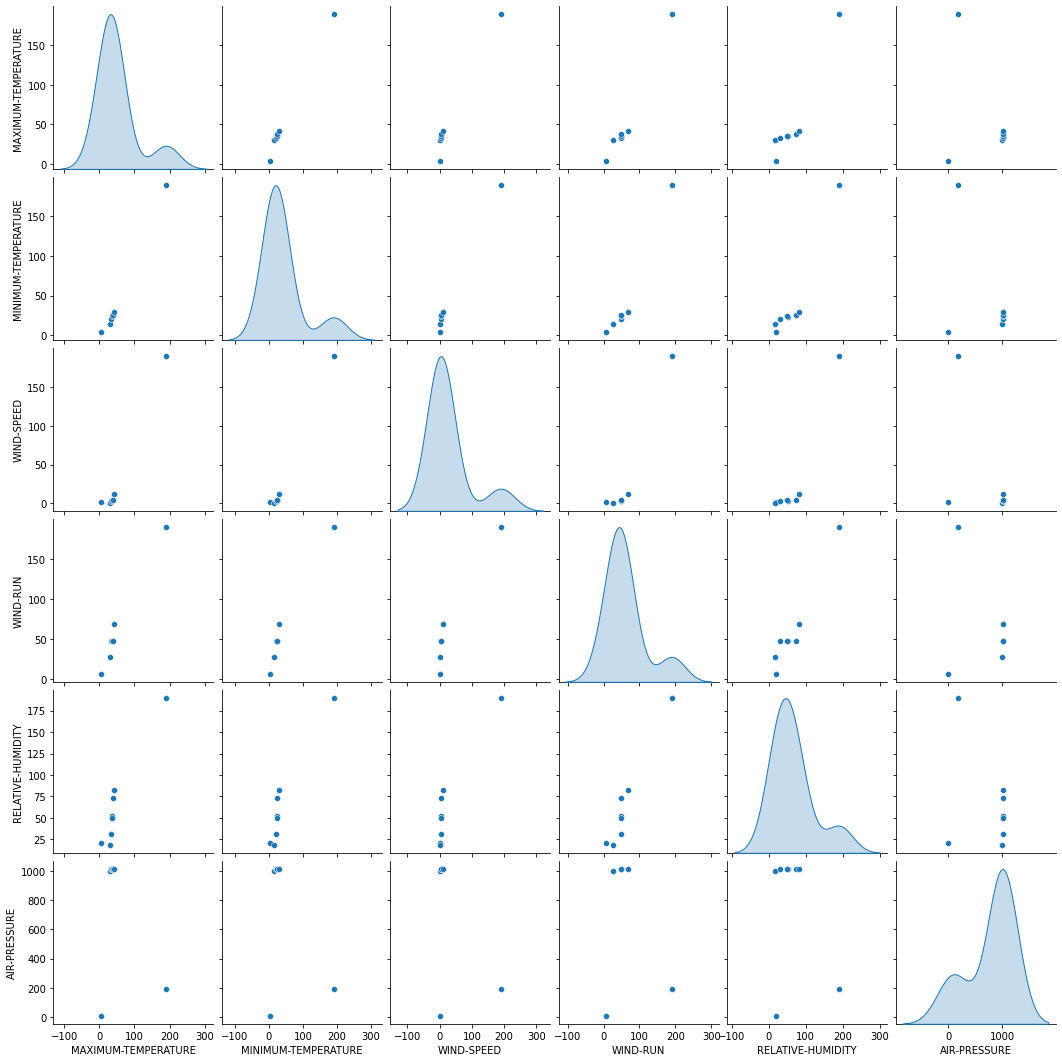

In [98]:

train_stats = train_dataset.describe()
train_stats.pop("WIND-DIRECTION")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

### Statistics on the train dataset to make sure it in a good shape

In [99]:

train_stats = train_dataset.describe()
wind_direction=train_stats.pop("WIND-DIRECTION")
train_stats = train_stats.transpose()
#train_stats
wind_direction

count    190.000000
mean     168.447368
std       52.876565
min       66.000000
25%      122.250000
50%      170.000000
75%      208.000000
max      272.000000
Name: WIND-DIRECTION, dtype: float64

## The label is "WIND-SPEED"

In [100]:
train_labels = train_dataset.pop('WIND-SPEED')
test_labels = test_dataset.pop('WIND-SPEED')
valid_labels = valid_dataset.pop('WIND-SPEED')

## Data Normalization/Scaling

## Subtract the mean of the training data and divide by the standard deviation

### define a function to normalize the data set.

In [101]:


from sklearn.preprocessing import MinMaxScaler

def norm(x):
    cols_to_scale= ['MAXIMUM-TEMPERATURE','MINIMUM-TEMPERATURE','WIND-DIRECTION','RELATIVE-HUMIDITY','WIND-RUN','AIR-PRESSURE']
    scaler = MinMaxScaler()
    x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])
    return x
      #return (x - train_stats['mean'] / train_stats['std'])
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [102]:
print(f'Train/Test/Validate splits: ')
print(f'Train       : {normed_train_data.shape} ')
print(f'Test        : {normed_test_data.shape} ')
print(f'Validate    : {normed_valid_dataset.shape} ')

print(f'Train/Test/Validate labels: ')
print(f'Train Labels : {train_labels.shape}')
print(f'Test Labels  : {test_labels.shape}')
print(f'Test Labels  : {valid_labels.shape}')

Train/Test/Validate splits: 
Train       : (190, 6) 
Test        : (64, 6) 
Validate    : (64, 6) 
Train/Test/Validate labels: 
Train Labels : (190,)
Test Labels  : (64,)
Test Labels  : (64,)


## show a sample of the data after normalized

In [103]:

normed_train_data.head(10)

,MAXIMUM-TEMPERATURE,MINIMUM-TEMPERATURE,WIND-DIRECTION,WIND-RUN,RELATIVE-HUMIDITY,AIR-PRESSURE
173,0.302521,0.701987,0.543689,0.494033,0.846154,0.850000
147,0.873950,0.953642,0.490291,0.494033,0.507692,0.635714
264,0.504202,0.403974,0.262136,0.233890,0.153846,0.342857
113,0.310924,0.668874,0.587379,0.494033,0.923077,0.835714
107,0.420168,0.231788,0.194175,0.494033,0.369231,0.878571
277,0.764706,0.682119,0.407767,0.207637,0.046154,0.128571
293,0.100840,0.443709,0.601942,0.000000,0.615385,0.392857
238,0.571429,0.496689,0.349515,0.494033,0.261538,0.821429
230,0.823529,0.827815,0.538835,0.494033,0.107692,0.764286
179,0.521008,0.198675,0.169903,0.494033,0.338462,0.907143


## Build a Neural Network Model

### We declared a function for creating a model.

In [104]:


def model1_single_layer_perceptron():
    model = keras.Sequential([
       keras.layers.Dense(1,input_shape=(6,)) 
    ])
    model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse','mape'])
    
    return model
    
        

In [105]:
model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

Here is a summary of this model: 
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


## import NN and other components.

In [106]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers

In [107]:
def model2_multilayer_perceptron_with_one_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 10 Neurons
      model.add(Dense(10, input_shape =(normed_train_data.shape[1],)))
      
    
      model.add(Dropout(0.5))
    
      model.add(Dense(35, Activation('relu'))) # Hidden layer 1
        
      model.add(Dropout(0.5))

      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model


In [108]:
model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

Here is a summary of this model: 
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_1 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [109]:
def model3_multilayer_perceptron_with_two_hidden_layer():
      model = Sequential()
     # The model so far is empty. It can be constructed by adding layers and compilation.
     # This Keras model with a single hidden layers.
        
     # Input Layer with 32 Neurons
      model.add(Dense(32, input_shape =(normed_train_data.shape[1],)))
 
      model.add(Dense(32, Activation('relu'))) # Hidden layer 1
      model.add(Dropout(0.5))
        
      model.add(Dense(64, Activation('relu'))) # Hidden layer 2
    
      model.add(Dense(72, Activation('relu'))) # Hidden layer 2
        
      model.add(Dropout(0.5))

      model.add(Dense(80, Activation('relu'))) # Hidden layer 2
        
      model.add(Dropout(0.5))
    
      model.add(Dense(1))  # Output layer => output dimension = 1
    
      learning_rate = 0.001
    
      optimizer = optimizers.RMSprop(learning_rate)
  
      model.compile(loss='mse',optimizer=optimizer, metrics=['mae','mse','mape']) 
      return model

In [110]:
model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')


model3.summary()


Here is a summary of this model: 
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_25 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_27 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_3 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_28 (Dense)    

## Test the model before training (this will use the initial weights)

In [111]:

example_result_1 = model1.predict(normed_train_data) # Here we are using the single layer perceptron model



## Compare the predicted values with the actual values 

In [112]:
print('Predicted Values')
print(example_result_1[:10])
print()
print('Actual Values')
print(train_labels[:10].to_string(index=False))

Predicted Values
[[-0.2917351 ]
 [ 0.3193807 ]
 [ 0.23072654]
 [-0.23415071]
 [-0.32388714]
 [ 0.69111884]
 [ 0.02674261]
 [-0.09097707]
 [ 0.24043083]
 [-0.2678721 ]]

Actual Values
5.0
5.0
1.7
4.0
4.0
3.0
1.9
4.0
5.0
3.0


## Save checkpoints during training

In [113]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

## Training the model we built above.

### Training the single layer perceptron

In [114]:
# Tensorflow utils packages.
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [115]:
%%time

EPOCHS = 500
batch_size = 6

model1 = model1_single_layer_perceptron()
print('Here is a summary of this model: ')
model1.summary()

with tf.device('/CPU:0'):
    history = model1.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:8.7130,  mae:2.9254,  mape:100.0329,  mse:8.7130,  val_loss:9.9651,  val_mae:2.9356,  val_mape:93.2189,  val_mse:9.9651,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 100, loss:14.4896,  mae:3.7154,  mape:85.7767,  mse:14.4896,  val_loss:7.7516,  val_mae:2.5428,  val_mape:79.1904,  val_mse:7.7516,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 200, loss:12.0574,  mae:3.1957,  mape:71.7952,  mse:12.0574,  val_loss:5.9798,  val_mae:2.1779,  val_mape:66.1585,  val_mse:5.9798,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 300, loss:8.9049,  mae:2.8578,  mape:68.0799,  mse:8.9049,  val_loss:4.5943,  val_mae:1.8428,  val_mape:54.1938,  val_mse:4.5943,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets



Epoch: 400, loss:2.2331,  mae:1.3245,  mape:42.7493,  mse:2.2331,  val_loss:3.5032,  val_mae:1.5284,  val_mape:42.9732,  val_mse:3.5032,  
.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


.INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction.ckpt\assets


Wall time: 8min 37s


In [116]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,3.822953,1.747905,3.822953,44.830627,2.721658,1.273557,2.721658,34.241352,495
496,2.843245,1.319448,2.843245,33.007687,2.714983,1.271322,2.714983,34.168194,496
497,4.381100,1.978749,4.381100,47.963848,2.708179,1.269038,2.708179,34.093479,497
498,20.415651,3.083353,20.415651,53.155872,2.700851,1.266568,2.700851,34.012486,498
499,4.622335,1.668733,4.622335,45.515713,2.693787,1.264182,2.693787,33.934273,499


In [117]:
# Test the model after training
example_result_2 = model1.predict(normed_test_data)

## Compare the predicted values with the actual values

In [118]:
print('Predicted Values')
print(example_result_2[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[2.2192607]
 [1.9059596]
 [1.3939753]
 [1.313272 ]
 [1.5370605]
 [0.8431319]
 [1.6957397]
 [2.0240405]
 [1.8748178]
 [1.3362715]]

Actual Values
1.0
4.0
3.0
5.0
4.0
3.3
5.0
4.0
4.0
3.0


In [119]:
print('The ground truth: ')
train_labels[:10]

The ground truth: 


173    5.0
147    5.0
264    1.7
113    4.0
107    4.0
277    3.0
293    1.9
238    4.0
230    5.0
179    3.0
Name: WIND-SPEED, dtype: float64

## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-speed]')

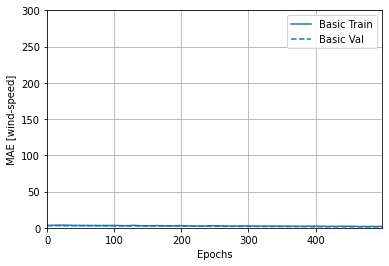

In [120]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,300])
plt.ylabel('MAE [wind-speed]')

Text(0, 0.5, 'MSE [wind-speed]')

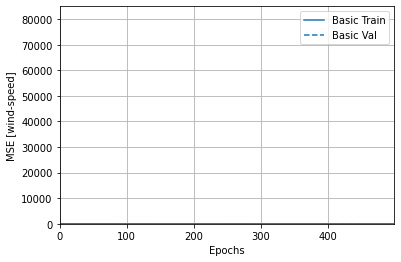

In [121]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,85000])
plt.ylabel('MSE [wind-speed]')

In [122]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model1.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 5.1598 - mae: 1.8547 - mse: 5.1598 - mape: 11159576.0000
Train set Mean Abs Error :  1.85
Train set Mean Square Error :  5.16


In [123]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 2.6938 - mae: 1.2642 - mse: 2.6938 - mape: 33.9343
Validation set Mean Abs Error :  1.26
Validation set Mean Square Error :  2.69


In [124]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model1.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 4.0036 - mae: 1.7371 - mse: 4.0036 - mape: 52.0533
Testing set Mean Abs Error :  1.74
Testing set Mean Square Error :  4.00


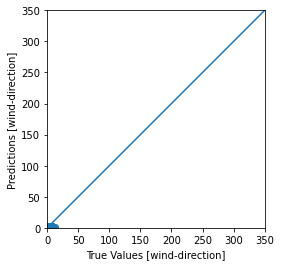

In [125]:
train_predictions = model1.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

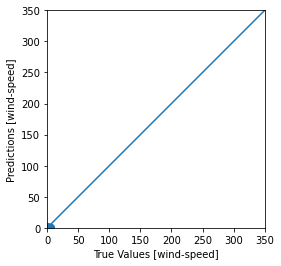

In [126]:
test_predictions = model1.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

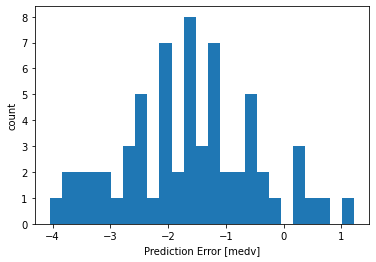

In [127]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## One hidden layer analysis

In [128]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction2.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [129]:
%%time

EPOCHS = 500
batch_size = 6

model2 = model2_multilayer_perceptron_with_one_hidden_layer()
print('Here is a summary of this model: ')
model2.summary()

with tf.device('/CPU:0'):
    history = model2.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                70        
_________________________________________________________________
dropout_5 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 35)                385       
_________________________________________________________________
dropout_6 (Dropout)          (None, 35)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 36        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________

Epoch: 0, loss:13.9768,  mae:3.6706,  mape:96.7701,  mse:13.9768,  val_loss:10.0062,  

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 100, loss:3.9626,  mae:1.6728,  mape:52.4938,  mse:3.9626,  val_loss:1.8814,  val_mae:1.0464,  val_mape:28.7591,  val_mse:1.8814,  
...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


...................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets



Epoch: 200, loss:4.2216,  mae:1.7031,  mape:43.5791,  mse:4.2216,  val_loss:1.2420,  val_mae:0.8677,  val_mape:27.3826,  val_mse:1.2420,  
.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction2.ckpt\assets


.............................................................
Epoch: 300, loss:8.0335,  mae:2.2274,  mape:47.3444,  mse:8.0335,  val_loss:1.2888,  val_mae:0.8808,  val_mape:27.2259,  val_mse:1.2888,  
....................................................................................................
Epoch: 400, loss:15.3639,  mae:2.7218,  mape:45.0732,  mse:15.3639,  val_loss:1.2288,  val_mae:0.8623,  val_mape:27.3839,  val_mse:1.2288,  
....................................................................................................Wall time: 4min 32s


In [130]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,1.821503,1.176865,1.821503,30.854773,1.190036,0.855257,1.190036,27.906061,495
496,1.935895,1.049265,1.935895,35.023819,1.202752,0.858634,1.202752,27.788191,496
497,5.165882,2.064785,5.165882,85.724609,1.210306,0.860505,1.210306,27.709229,497
498,2.184635,1.379847,2.184635,38.249527,1.203339,0.859061,1.203339,27.791372,498
499,2.297550,1.372879,2.297550,34.673046,1.193098,0.856236,1.193098,27.870958,499


In [131]:
# Test the model after training
example_result_3 = model2.predict(normed_test_data)

## Compare the predicted values with the actual values

In [132]:
print('Predicted Values')
print(example_result_3[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.0805695]
 [2.9558265]
 [2.544259 ]
 [2.253598 ]
 [2.6260273]
 [1.8853054]
 [2.8033285]
 [3.0746038]
 [2.9568286]
 [2.5709727]]

Actual Values
1.0
4.0
3.0
5.0
4.0
3.3
5.0
4.0
4.0
3.0


In [133]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,1.821503,1.176865,1.821503,30.854773,1.190036,0.855257,1.190036,27.906061,495
496,1.935895,1.049265,1.935895,35.023819,1.202752,0.858634,1.202752,27.788191,496
497,5.165882,2.064785,5.165882,85.724609,1.210306,0.860505,1.210306,27.709229,497
498,2.184635,1.379847,2.184635,38.249527,1.203339,0.859061,1.203339,27.791372,498
499,2.297550,1.372879,2.297550,34.673046,1.193098,0.856236,1.193098,27.870958,499


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

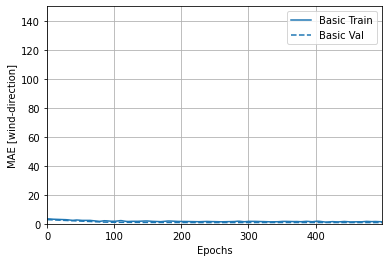

In [134]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,150])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

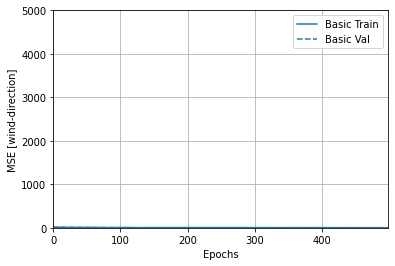

In [135]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [136]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model2.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2.3252 - mae: 1.1293 - mse: 2.3252 - mape: 16588195.0000
Train set Mean Abs Error :  1.13
Train set Mean Square Error :  2.33


In [137]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 0s - loss: 1.1931 - mae: 0.8562 - mse: 1.1931 - mape: 27.8710
Validation set Mean Abs Error :  0.86
Validation set Mean Square Error :  1.19


In [138]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model2.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 1.6609 - mae: 1.0498 - mse: 1.6609 - mape: 39.2208
Testing set Mean Abs Error :  1.05
Testing set Mean Square Error :  1.66


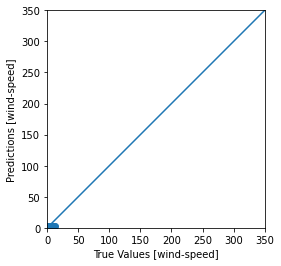

In [139]:
train_predictions = model2.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

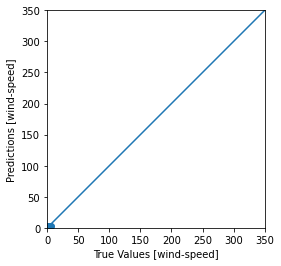

In [140]:
test_predictions = model2.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-speed]')
plt.ylabel('Predictions [wind-speed]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

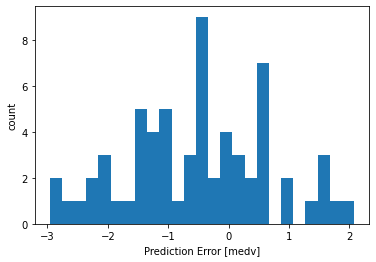

In [141]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("count")

## Two hidden layer analysis

In [142]:
# checkpoint_path
checkpoint_path = r".\models\wind_direction_prediction3.ckpt"

#create a callback that saves the model's weight
ckpt_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,monitor='val_loss',
                                                 save_best_only=True,verbose=0,)

In [143]:
%%time

EPOCHS = 500
batch_size = 6

model3 = model3_multilayer_perceptron_with_two_hidden_layer()
print('Here is a summary of this model: ')
model3.summary()

with tf.device('/CPU:0'):
    history = model3.fit(
        normed_train_data,
        train_labels,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch= 1,
        validation_data = (normed_valid_dataset, valid_labels),
        callbacks=[tfdocs.modeling.EpochDots(), ckpt_callback],
    )


Here is a summary of this model: 
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 32)                224       
_________________________________________________________________
dense_35 (Dense)             (None, 32)                1056      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_37 (Dense)             (None, 72)                4680      
_________________________________________________________________
dropout_8 (Dropout)          (None, 72)                0         
_________________________________________________________________
dense_38 (Dense)   

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.......

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...............

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........................
Epoch: 100, loss:2.8399,  mae:1.4895,  mape:444449824.0000,  mse:2.8399,  val_loss:1.3798,  val_mae:0.9103,  val_mape:27.4385,  val_mse:1.3798,  
........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


....................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.........

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


...................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


.

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


................................
Epoch: 200, loss:1.5745,  mae:0.9689,  mape:41.0059,  mse:1.5745,  val_loss:1.8039,  val_mae:1.0129,  val_mape:27.8680,  val_mse:1.8039,  
....................................................................................................
Epoch: 300, loss:1.2353,  mae:0.9150,  mape:24.9480,  mse:1.2353,  val_loss:1.1402,  val_mae:0.8281,  val_mape:27.2002,  val_mse:1.1402,  
..................................................................

INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


INFO:tensorflow:Assets written to: .\models\wind_direction_prediction3.ckpt\assets


..................................
Epoch: 400, loss:2.1133,  mae:1.3854,  mape:34.2559,  mse:2.1133,  val_loss:1.1924,  val_mae:0.8536,  val_mape:27.7240,  val_mse:1.1924,  
....................................................................................................Wall time: 2min 44s


In [144]:
print('Summary of the results after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary of the results after each epoch: 


,loss,mae,mse,mape,val_loss,val_mae,val_mse,val_mape,epoch
495,0.388756,0.526941,0.388756,18.671633,1.315751,0.877546,1.315751,26.422226,495
496,0.330422,0.509140,0.330422,15.409660,1.284178,0.868740,1.284178,26.438292,496
497,2.235874,1.123788,2.235874,23.218603,1.141429,0.825415,1.141429,26.805586,497
498,3.370271,1.608061,3.370271,120.607208,1.271114,0.865429,1.271114,26.491125,498
499,2.565795,1.162034,2.565795,23.793161,1.136341,0.822873,1.136341,26.857140,499


In [145]:
# Test the model after training
example_result_4 = model3.predict(normed_test_data)


## Compare the Actual Values with the predicted values

In [146]:
print('Predicted Values')
print(example_result_4[:10])
print()
print('Actual Values')
print(test_labels[:10].to_string(index=False))

Predicted Values
[[3.4791148]
 [3.126559 ]
 [2.1465495]
 [2.3751214]
 [2.4493036]
 [1.9426583]
 [2.5331452]
 [3.3152182]
 [3.4076679]
 [2.152806 ]]

Actual Values
1.0
4.0
3.0
5.0
4.0
3.3
5.0
4.0
4.0
3.0


## See how the training went by plotting the loss/mse across epochs

Text(0, 0.5, 'MAE [wind-direction]')

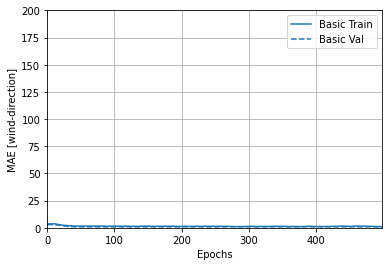

In [147]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0,200])
plt.ylabel('MAE [wind-direction]')

Text(0, 0.5, 'MSE [wind-direction]')

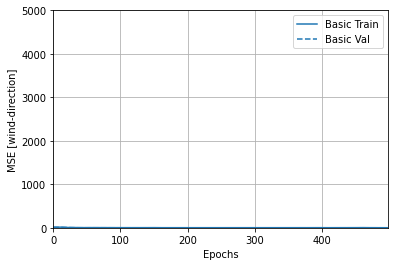

In [148]:
plotter.plot({'Basic': history}, metric = 'mse')
plt.ylim([0,5000])
plt.ylabel('MSE [wind-direction]')

In [149]:
print('Error Rate on Train Split: ')
loss, mae, mse, mape = model3.evaluate(normed_train_data, train_labels, verbose=2)

print('Train set Mean Abs Error : {:5.2f}'.format(mae))
print('Train set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Train Split: 
6/6 - 0s - loss: 2.1756 - mae: 1.0724 - mse: 2.1756 - mape: 17102470.0000
Train set Mean Abs Error :  1.07
Train set Mean Square Error :  2.18


In [150]:
print('Error Rate on Evaluation  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_valid_dataset, valid_labels, verbose=2)

print('Validation set Mean Abs Error : {:5.2f}'.format(mae))
print('Validation set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Evaluation  Split: 
2/2 - 1s - loss: 1.1363 - mae: 0.8229 - mse: 1.1363 - mape: 26.8571
Validation set Mean Abs Error :  0.82
Validation set Mean Square Error :  1.14


In [151]:
print('Error Rate on Test  Split: ')
loss, mae, mse, mape = model3.evaluate(normed_test_data, test_labels, verbose=2)

print('Testing set Mean Abs Error : {:5.2f}'.format(mae))
print('Testing set Mean Square Error : {:5.2f}'.format(mse))

Error Rate on Test  Split: 
2/2 - 0s - loss: 1.7634 - mae: 1.0729 - mse: 1.7634 - mape: 39.2305
Testing set Mean Abs Error :  1.07
Testing set Mean Square Error :  1.76


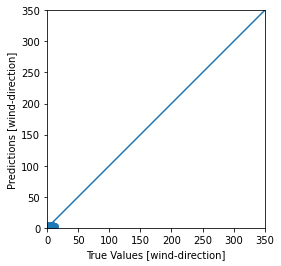

In [152]:
train_predictions = model3.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_labels, train_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

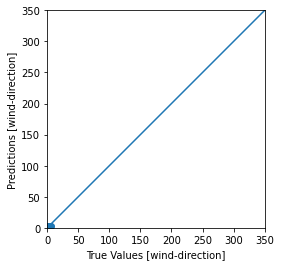

In [153]:
test_predictions = model3.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [wind-direction]')
plt.ylabel('Predictions [wind-direction]')
lims = [0, 350]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

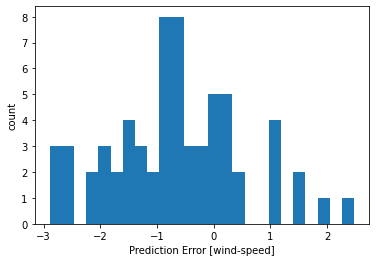

In [154]:
# error distribution.
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [wind-speed]")
_ = plt.ylabel("count")